MANDINE Loic - DENIS Hansi - MALTESE Salomé - TRAORE Yacouba - DJENKAL Thelio  | Dataset sur le Baseball et les performances de joueurs en 1986

[***Lien du fichier excel***](https://unice-my.sharepoint.com/:x:/g/personal/lionel_fillatre_unice_fr/EWqAx6mr9WZIs4vn2wmmspsBaYPBEcdOFaX2acjHy_JulQ?e=KkHwRM)

[***Lien vers openML dataset***](https://www.openml.org/d/525)

In [ ]:
#import nécessaires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import networkx as nx
from sklearn.cluster import KMeans

In [ ]:
#on convertit le fichier csv en une dataframe de panda
data = pd.read_csv("./baseball-hitter.csv")
data

,hitters_name,number_of_times_at_bat_in_1986,number_of_hits_in_1986,number_of_home_runs_in_1986,number_of_runs_in_1986,number_of_runs_batted_in_in_1986,number_of_walks_in_1986,number_of_years_in_the_major_leagues,number_of_times_at_bat_during_his_career,number_of_hits_during_his_career,number_of_home_runs_during_his_career,number_of_runs_during_his_career,number_of_runs_batted_in_during_his_career,number_of_walks_during_his_career,players_league_at_the_end_of_1986,players_division_at_the_end_of_1986,players_team_at_the_end_of_1986,players_position(s)_in_1986,number_of_put_outs_in_1986,number_of_assists_in_1986,number_of_errors_in_1986,1987_annual_salary_on_opening_day_in_thousands_of_dollars,players_league_at_the_beginning_of_1987,players_team_at_the_beginning_of_1987
0,Andy_Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,Cle.,C,446,33,20,?,A,Cle.
1,Alan_Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,Hou.,C,632,43,10,475,N,Hou.
2,Alvin_Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,Sea.,1B,880,82,14,480,A,Sea.
3,Andre_Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,Mon.,RF,200,11,3,500,N,Chi.
4,Andres_Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,Mon.,1B,805,40,4,91.5,N,Mon.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Willie_McGee,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,St.L.,CF,325,9,3,700,N,St.L.
318,Willie_Randolph,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,N.Y.,2B,313,381,20,875,A,N.Y.
319,Wayne_Tolleson,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,Chi.,3B,37,113,7,385,A,N.Y.
320,Willie_Upshaw,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,Tor.,1B,1314,131,12,960,A,Tor.


 

---


 # Pré-traitement et sélection des données à analyser


---





---


Remarque sur les valeurs non-définis dans data:


> **Les valeurs NAN sont des '?' dans data**. Ainsi, la présence d'un '?' dans un des éléments de la colonne impliquera que le type de cette colonne ne sera pas **int64**


> Supprimmer les colonnes à valeurs non-numériques (data.column[c].dtype!=int64), supprimera aussi les colonnes contenant des valeurs NAN.



---


In [ ]:
"""
On supprime toutes les colonnes à valeurs non-numériques.
On gardera juste la première colonne qui correspond aux noms des joueurs.
Cela nous permettra de travailler avec des données numériques.
"""
# je récupère le nom de toutes les colonnes sauf la première car je veux garder le nom des joueurs
_ , *columns_without_first_one = data.columns 

for c in columns_without_first_one: #on parcourt les colonnes de data (sauf la première)
  if (data[c].dtype != "int64") : #si la colonne data[c] n'est pas de type 'int64'
    del data[c] #on la supprime de data

In [ ]:
"""
Sélection des données à analyser:
Ici on choisit nos deux colonnes à analyser que nous allons classifier
"""
# on séléctionne nos deux colonnes par les labels des colonnes
col1 , col2 = "number_of_years_in_the_major_leagues" , "number_of_home_runs_during_his_career"

#on vérifie qu'on a pas pris la première colonne
if (col1==data.columns[0] or col2==data.columns[0]):
  print("!!! Attention vous avez choisi la première colonne de data (non-numérique) !!!")

#on vérifie que les noms de nos colonnes sont correctes
if col1 not in data.columns or col2 not in data.columns:
  print("!!! Attention vous choisissez des colonnes qui n'existe pas dans data !!!")
  
#on stocke les deux colonnes de données dans X qui sera une dataframe panda
X=data.loc[ : , [ col1 , col2 ] ]

In [ ]:
"""
On réduit ici le nombre de données (lignes) de X
"""

#ici on réduit via le nombre d'années (première colonne)
#val contient le masque booléen 
#val = X.iloc[:,0]<13

#ici on réduit via le nombre de home runs (deuxième colonne)
#val contient le masque booléen 
val = X.iloc[:,1]<75

# les éléments indexés par des falses deviennent NaN
X=X.mask(val)

# ainsi, on enléve les lignes (axis=0) qui contiennent des NAN
X=X.dropna()



---


# Unsupervised classification with K-means 

---



array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2,
       0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1,
       0, 1, 2, 0, 1, 1], dtype=int32)

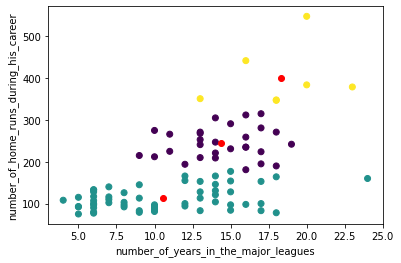

In [ ]:
def K_means(donnee,k):
  """
  donnee : type panda.dataframe; doit avoir deux colonnes 
  k : entier strict. positive qui indique le nombre de cluster

  Cette fonction implémente la méthode de classification de K-means.
  On appelle le modèle K-means implémenté dans scikit-learn.

  La méthode d'initialisation concernant les centroides, est par défaut : 'k-means++'
  cette méthode consiste à placer les centroids sur des points du dataset éloignés les uns des autres
  Cela facilite la convergence

  Le paramètre n_init est le nombre de fois que l'algorithme va tourner avec
  des différentes centroids initiaux. Le résultat final sera celui associé à l'inertia la plus petite.
  
  Le paramètre max_iter est le nombre maximum de l'algorithme k-mean pour une seule exécution
  """
  #modele.inertia_ est la fonction-coût : pour chaque clusters, somme des distances entre les points et le centroide

  #on crée le modèle
  modele = KMeans(n_clusters=k, n_init=10 , max_iter=300 , init='k-means++')

  #on entraine notre modèle sur les données 
  modele.fit(donnee)

  #on dessine le nuage de points de nos données avec les clusters crée par le modèle
  plt.scatter( donnee.iloc[ : , 0 ] , donnee.iloc[ : , 1 ],c=modele.labels_)

  #position des centroides
  centroides=modele.cluster_centers_

  #on dessine les centroides
  plt.scatter( centroides[ : , 0 ] , centroides[ : , 1 ] , c='r' )
  plt.xlabel(donnee.columns[0])
  plt.ylabel(donnee.columns[1])

  # on retourne le vecteur correspondant aux labels de chaque point
  # c'est-à-dire à quel cluster chaque point appartient
  return modele.labels_

K_means(X,3)

**Interprétation:** on observe ici en réalisant un clustering K-Means des données du nombre de home_runs en carrière par rapport à la durée de sa carrière pour chacun des jours les regroupements suivants:
*(les couleurs peuvent changer a chaque exécution)*



*   en violet en bas on a les joueurs qui ont réussi un nombre faible de homeruns par rapport au temps passé en ligue majeures
*   en jaune ceux avec un nombre moyen de home-runs
*   en bleu les "home-runs specialists" qui en ont réussi un nombre supérieur à la moyenne au cours de leurs carrières


---



Text(0, 0.5, 'cout de notre modèle (inertia)')

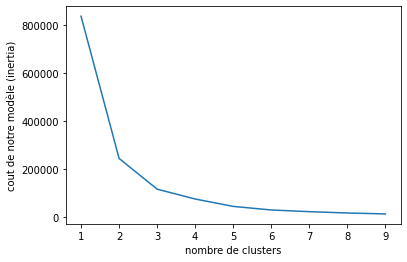

In [ ]:
"""
Comment choisir notre K pour l'algorithme K-mean - Méthode du coude:
Détecter une zone de coude dans la minimisation du coût (inertia_)
On trace l'évolution du cout de notre modèle (inertia) en fonction du nombre de clusters 
La zone de coude nous indique le nb de clusters optimal,
Dans l'optique de réduire au maximum le cout de notre modéle tout en conservant au nombre raisonnable de cluster
Exemple pour avoir un cout égale à 0 on choisit autant de cluster que de point
"""
# vecteur qui stockera les inertia (valeur de la fonction-coût)
cout = []
k_range = range(1,10)
for k in k_range:
  test = KMeans(n_clusters=k).fit(X)
  cout.append(test.inertia_)

plt.plot(k_range,cout)
plt.xlabel("nombre de clusters")
plt.ylabel("cout de notre modèle (inertia)")


interprétation de la zone de coude : les k optimaux sont 2,3 4



---


# Dataset to connectivity graph


---



**Calcul des matrices de distances et de similarités par rapport aux points de notre dataset X**

In [ ]:
"""
Tout d'abord, on génére la matrice des distances (euclidiennes) de nos points.
Ces points étant les lignes de X et donc de dimension deux.
La matrice obtenue sera symétrique (par symétrie de la distance) et de diagonale nulle (distance d'un point avec lui-même est 0).
L'élément i,j sera par exemple la distance entre le point i et j 
"""
def distance(x1,y1,x2,y2):
  return math.sqrt( (y1-y2)**2 + (x1-x2)**2 )

#nombre de sommets = nombre de lignes de X 
nb_point=X.shape[0]

# on crée la matrice carrée nulle de dimension : nb_point
matrice_distances=np.zeros((nb_point,nb_point))

#pour chaque point
for ligne in range(0,nb_point): 
  #point actuel : X.iloc[ligne] de coordonnées : (X.iloc[ligne][0] , X.iloc[ligne][1])
  for point in range(ligne+1, nb_point): 
    #pour les points strictement en dessous dans X, on rajoute leur distance au bons endroits dans la matrice
    #d=np.linalg.norm((X.iloc[ligne]-X.iloc[point]))
    d=distance( X.iloc[ligne][0] , X.iloc[ligne][1] , X.iloc[point][0] , X.iloc[point][1] )
    matrice_distances[ligne][point]=d 
    matrice_distances[point][ligne]=d

#on vérifie que la matrice obtenue est bien cohérente
print(matrice_distances-matrice_distances.T) #cense être la matrice nulle

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
"""
Ensuite, à partir de la matrice des distances, on génére la matrice de similarités
La matrice obtenue sera symétrique (par symétrie de la distance) et de diagonale nulle.
L'élément i,j sera par exemple le poids sur l'arête reliant le point i et j.
Cependant, il faut qu'il y ait des zéros pour des points non-connectés.
Or, la formule de la similarité entre deux points non-connectés vaut 1 (exp(0)=1).
"""

#on choisit une valeur pour sigma
sigma=100
#Transition de la matrice des distances vers la matrice de similarité
#pour chaque élément, si il est égale à 0, on garde l'élément qu'il y avait dans matrice_distances, sinon on calcule cet élément via la formule de similarité
matrice_similarites=np.where(matrice_distances==0,matrice_distances,np.exp(-1*(np.square(matrice_distances)/(2*(sigma**2)))))

#on vérifie que la matrice est bien cohérente et juste
# print(matrice_similarites-matrice_similarites.T)
# print(np.array(np.where(matrice_similarites==0))-np.array(np.where(matrice_distances==0)))
# matrice_similarites

**Application du SKNG : on garde les k-voisins d'un point. On peut travailler avec les distances comme les similarités; les indices des k-voisins seront les mêmes. Ainsi, pour chaque point, on garde les indices des k points les plus proches/similaires (via la fonction argsort)**

In [ ]:
"""
Symmetric k-nearest neighbor graph.
Pour chaque ligne (donc pour chaque point), on va la trier avec np.argsort et garder les k premiers indices retournée par cette dernière.
Attention, la premier indice retourné par arg.sort correspond à celui de la diagonale puisqu'il s'agit d'une distance/similarité égale à zéro.
Une fois les k-indices obtenus, on saura quels termes garder sur la ligne (ces termes seront les distances/similarités des k-voisins) et mettre tous les autres termes à 0.
"""
#on fixe le nombre de voisins qu'on veut garder pour chaque point
k=6

# nombre de points
nb_ligne=matrice_distances.shape[0]

# on crée la matrice carrée nulle de dimension : nb_point
matrice_k_voisins=np.zeros((nb_ligne,nb_ligne))

# pour chaque point
for ligne in range(0,nb_ligne):  
  # on récupère les indices de ses k-voisins (on ne prend pas le premier indice)
  indices_k_voisins=np.argsort(matrice_distances[ligne])[1:k+1]
  # puis, sur la ligne on aura que des 0 sauf pour ces k indices où on aura les distances 
  matrice_k_voisins[ligne][indices_k_voisins]=matrice_distances[ligne][indices_k_voisins]

#on vérifie que la matrice obtenue est satisfaisante
for line in range(matrice_k_voisins.shape[0]):
  print(np.where(matrice_k_voisins[line]!=0))
#on voit que pour chaque ligne, seulement k éléments sont non-nuls.
#Il y a des lignes pour lesquels on a moins de k éléments non-nuls qui correspond à des points confondus entre eux (joueurs ayant les mêmes stats).

(array([ 7,  8, 10, 11, 20, 43]),)
(array([27, 29, 35, 42, 45, 91]),)
(array([34, 46, 63, 66, 71, 73]),)
(array([ 5,  6, 15, 30, 48, 50]),)
(array([17, 53, 55, 74, 80, 93]),)
(array([ 6, 15, 25, 51, 77, 83]),)
(array([ 3,  5, 15, 25, 77, 83]),)
(array([ 0,  8, 10, 11, 20, 43]),)
(array([ 0,  7, 20, 38, 69, 70]),)
(array([25, 28, 47, 51, 83, 84]),)
(array([ 0,  7, 35, 43, 91]),)
(array([ 0,  7, 35, 43, 91]),)
(array([23, 54, 63, 64, 75, 76]),)
(array([22, 27, 33, 39, 45, 86]),)
(array([41, 62, 65, 72, 82, 92]),)
(array([ 3,  5,  6, 25, 83, 84]),)
(array([36, 47, 49, 59, 61]),)
(array([ 4, 19, 53, 55, 66, 74]),)
(array([13, 21, 22, 32, 40, 78]),)
(array([ 4, 17, 53, 55, 66, 74]),)
(array([ 0,  7,  8, 43, 69, 70]),)
(array([18, 40, 44, 57, 78, 90]),)
(array([13, 32, 33, 39, 78, 86]),)
(array([12, 54, 63, 64, 75, 76]),)
(array([21, 40, 44, 57, 81, 90]),)
(array([ 5,  9, 51, 77, 83, 84]),)
(array([37, 46, 52, 71, 73, 93]),)
(array([ 1, 33, 39, 42, 45, 86]),)
(array([ 9, 25, 47, 51, 83, 84])

**Application du MKNG : parmi les k-voisins d'un point, on ne garde que les connexions réciproques entre lui et ces k-voisins.**

In [ ]:
"""
A partir de la matrice d'adjacence relative à la méthode SKNN, 
on calcule la matrice d'adjacence relative à la méthode MKNN.

On considère un graphe non-dirigé (undirected).
Ainsi, à partir de matrice_k_voisins, on garde seulement les termes qui sont associées à une connexion à double sens entre deux points.
"""
#on multiplie membre à membre, la matrice_k_voisins fois sa transposée, pour enlever les connexions à sens unique
matrice_mk_voisins=np.multiply(matrice_k_voisins,np.transpose(matrice_k_voisins))
#On remet les bonnes valeurs aux endroits des connexions mutuelles
matrice_mk_voisins=np.where(matrice_mk_voisins==0,matrice_mk_voisins,matrice_k_voisins)
print(sum(matrice_mk_voisins-matrice_k_voisins)) #vérification que les matrices sont bien différentes

[ -28.17115076    0.           -5.38516481  -18.11077028  -16.38516481
  -25.42471004  -15.13274595  -28.45266377    0.            0.
  -12.16552506  -12.16552506    0.          -89.20289808   -7.07106781
  -15.5241747     0.            0.         -169.56736187    0.
  -12.         -296.0310003   -24.08318916    0.            0.
  -35.22756528    0.          -16.15549442    0.            0.
    0.           -8.54400375    0.          -30.2654919   -13.27262736
    0.          -11.40175425    0.          -19.41648784  -54.11445395
 -294.03127394   -8.06225775    0.          -11.70469991 -164.
  -15.            0.            0.            0.          -12.04159458
    0.          -11.3137085     0.           -7.07106781  -35.12216945
  -18.69853564    0.         -288.17376337  -12.72792206   -7.81024968
    0.           -8.60232527    0.          -33.80784592  -32.03086851
   -8.60232527  -13.46710393   -6.70820393  -13.98831382    0.
  -52.17092237  -16.50214375    0.            0.      

Text(0.5, 1.0, 'Connectivity graph')

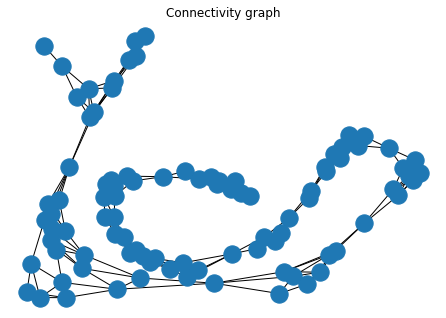

In [ ]:
"""
Enfin, on peut représenter notre dataset X en un graphe, à l'aide de sa représentation matricielle implentée ci-dessus.
On utilise la librairie networkx
"""
#we create a Graph object from adjency matrix of MKNN
#G = nx.from_numpy_matrix(matrice_k_voisins)
G = nx.from_numpy_matrix(matrice_mk_voisins)
#mapping= { i:f'$x_{i+1}$' for i in range(X.shape[0]) } #les étiquettes des sommets
#G = nx.relabel_nodes(G,mapping)
nx.draw(G)

# fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Connectivity graph')

# nx.draw(G, ax=ax)
# # turn the axis on
# ax.set_axis_on()
# ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

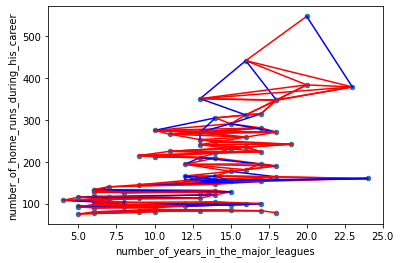

In [ ]:
X.plot.scatter(x="number_of_years_in_the_major_leagues",y="number_of_home_runs_during_his_career")
for ligne in range(0,nb_point): 
  for point in range(ligne+1, nb_point): 
    if matrice_mk_voisins[ligne][point] != 0:
      x=[X.iloc[ligne,0],X.iloc[point,0]]
      y=[X.iloc[ligne,1],X.iloc[point,1]]
      plt.plot(x,y,color='red')
    elif matrice_mk_voisins[ligne][point] == 0 and matrice_k_voisins[ligne][point] != 0:
      x=[X.iloc[ligne,0],X.iloc[point,0]]
      y=[X.iloc[ligne,1],X.iloc[point,1]]
      plt.plot(x,y,color='blue')  
    #d=np.linalg.norm((X.iloc[ligne]-X.iloc[point]))


  # Unsupervised classification with Spectral Clustering

Text(0, 0.5, 'number_of_home_runs_during_his_career')

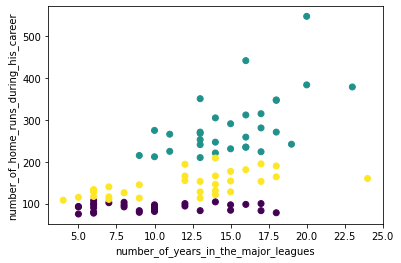

In [ ]:
#On génére notre matrice d'adjacency W
si=100
W=np.where(matrice_mk_voisins==0,matrice_mk_voisins,np.exp(-1*(np.square(matrice_mk_voisins)/(2*(si**2))))) #ici on passe des distances aux similarités

#On génére notre matrice des degrés de chaque sommet
d=np.sum(W,axis=0)
D=np.diag(d)

#On génére la mtarice laplacienne
L=D-W

#On normalise la laplacienne
Dd=np.sqrt(np.linalg.inv(D))
Ls=np.dot(np.dot(Dd,L),Dd)

#Decomposition en valeurs propres 
l,v=np.linalg.eig(Ls)

#trie des valeur propre et des vecteurs propres
indice=np.argsort(l)
valeur_p=l[indice]
vecteur=v[:,indice]

#on effectue un k-means sur l'espace généré par les k premiers vecteurs propres 
k=3
la=valeur_p[0:k]
vp=vecteur[:,0:k]

#on crée le modèle
modele = KMeans(n_clusters=k, n_init=10 , max_iter=300 , init='k-means++').fit(vp)

plt.scatter(X.iloc[:,0],X.iloc[:,1],c=modele.labels_)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

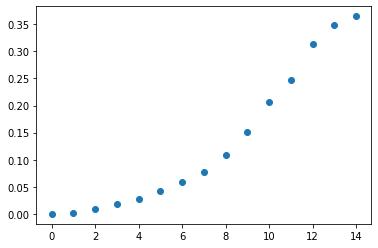

In [ ]:
"""
Méthode eigengap : On remarque le saut vertical le plus grand (correspondant à l'écart le plus grand entre deux valeurs propres consécutives)
"""
plt.scatter(np.arange(15),valeur_p[0:15])